In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Install TQDM for progress bars ###

conda install tqdm

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
### Import TQDM ###

%%capture
from tqdm import tqdm_notebook as tqdm
from tqdm import tnrange
tqdm().pandas()

In [4]:
### Get raw data for analysis ###

df = pd.read_csv('merged_raw_data_clean.csv', encoding='latin-1')

In [5]:
df

,Rank,Title,Adj. Lifetime Gross,Lifetime Gross,Est. Num Tickets,Year,Budget,Director,Actor,Genre,IMDB ID,Vote Count,Vote Average,Popularity
0,2,Star Wars: Episode IV - A New Hope,1.668980e+09,460998500.0,178119500.0,1977,11000000.0,George Lucas,"Mark Hamill, Harrison Ford, Carrie Fisher, Ale...","Action, Adventure, Fantasy, Sci-Fi",tt0076759,12970,8.2,41.110
1,3,The Sound of Music,1.335086e+09,159287540.0,142485200.0,1965,8200000.0,Robert Wise,"Julie Andrews, Christopher Plummer, Eleanor Pa...","Biography, Drama, Family, Musical, Romance",tt0059742,1889,7.7,14.111
2,4,E.T. the Extra-Terrestrial,1.329175e+09,435110560.0,141854300.0,1982,10500000.0,Steven Spielberg,"Henry Thomas, Drew Barrymore, Peter Coyote, De...","Family, Sci-Fi",tt0083866,7280,7.5,17.959
3,5,Titanic,1.270102e+09,659364000.0,135549800.0,1997,200000000.0,James Cameron,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...","Drama, Romance",tt0120338,16022,7.8,26.449
4,7,Jaws,1.200098e+09,260000000.0,128078800.0,1975,7000000.0,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...","Adventure, Drama, Thriller",tt0073195,5808,7.6,19.747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,996,Spy Kids 2: Island of Lost Dreams,1.384389e+08,85846430.0,14774700.0,2002,38000000.0,Robert Rodriguez,"Alexa PenaVega, Daryl Sabara, Antonio Banderas...","Action, Adventure, Comedy, Family, Sci-Fi",tt0287717,1297,5.5,10.703
904,997,Mystic River,1.383987e+08,90135190.0,14770400.0,2003,25000000.0,Clint Eastwood,"Sean Penn, Tim Robbins, Kevin Bacon, Emmy Rossum","Crime, Drama, Mystery, Thriller",tt0327056,3617,7.7,13.087
905,998,Sea of Love,1.382403e+08,58571510.0,14753500.0,1989,10017840.0,Harold Becker,"Al Pacino, Ellen Barkin, John Goodman, Michael...","Crime, Drama, Mystery, Romance, Thriller",tt0098273,292,6.7,10.014
906,999,Scrooged,1.382347e+08,60328560.0,14752900.0,1988,13027842.0,Richard Donner,"Bill Murray, Karen Allen, John Forsythe, John ...","Comedy, Drama, Fantasy, Romance",tt0096061,800,6.9,13.511


In [6]:
### Create new dataframe to only include movies in the last decade ###

df10 = df.loc[(df['Year'] >= 2010)]

In [7]:
df10

,Rank,Title,Adj. Lifetime Gross,Lifetime Gross,Est. Num Tickets,Year,Budget,Director,Actor,Genre,IMDB ID,Vote Count,Vote Average,Popularity
7,11,Star Wars: Episode VII - The Force Awakens,1.013038e+09,936662200.0,108115100.0,2015,245000000.0,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...","Action, Adventure, Sci-Fi",tt2488496,13865,7.4,28.812
11,16,Avengers: Endgame,8.926696e+08,858373000.0,95268900.0,2019,356000000.0,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Evans, Mark Ruffalo, ...","Action, Adventure, Drama, Sci-Fi",tt4154796,11389,8.3,38.570
20,29,The Avengers,7.203768e+08,623357900.0,76881200.0,2012,220000000.0,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...","Action, Adventure, Sci-Fi",tt0848228,21584,7.7,37.337
21,30,Jurassic World,7.195185e+08,652270660.0,76789600.0,2015,150000000.0,Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...","Action, Adventure, Sci-Fi",tt0369610,15085,6.6,25.921
22,31,Black Panther,7.146714e+08,700059600.0,76272300.0,2018,202003950.0,Ryan Coogler,"Chadwick Boseman, Michael B. Jordan, Lupita Ny...","Action, Adventure, Sci-Fi",tt1825683,14336,7.4,34.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,981,The Peanuts Movie,1.402333e+08,130178410.0,14966200.0,2015,99000000.0,Steve Martino,"Noah Schnapp, Bill Melendez, Hadley Belle Mill...","Adventure, Animation, Comedy, Drama, Family",tt2452042,981,6.6,10.825
895,986,The Legend of Tarzan,1.394415e+08,126643064.0,14881700.0,2016,180000000.0,David Yates,"Alexander SkarsgÃÃÃ¥Â«rd, Rory J. Saper, Chr...","Action, Adventure, Drama, Fantasy, Romance",tt0918940,4463,5.8,16.242
900,991,Lee Daniels' The Butler,1.387800e+08,116632100.0,14811100.0,2013,30000000.0,Lee Daniels,"Forest Whitaker, Oprah Winfrey, John Cusack, J...","Biography, Drama",tt1327773,2031,7.4,9.582
901,992,Horrible Bosses,1.387154e+08,117538560.0,14804200.0,2011,35000000.0,Seth Gordon,"Jason Bateman, Charlie Day, Jason Sudeikis, St...","Comedy, Crime",tt1499658,4232,6.5,11.970


In [36]:
### Clean data ###

actors_list = list(df10['Actor'])
actors_list
actors_list2 = ','.join(actors_list)


In [37]:
actors_list2

'Daisy Ridley, John Boyega, Oscar Isaac, Domhnall Gleeson,Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth,Robert Downey Jr., Chris Evans, Scarlett Johansson, Jeremy Renner,Chris Pratt, Bryce Dallas Howard, Ty Simpkins, Judy Greer,Chadwick Boseman, Michael B. Jordan, Lupita Nyongo, Danai Gurira,Robert Downey Jr., Chris Hemsworth, Mark Ruffalo, Chris Evans,Daisy Ridley, John Boyega, Mark Hamill, Carrie Fisher,Craig T. Nelson, Holly Hunter, Sarah Vowell, Huck Milner,Felicity Jones, Diego Luna, Alan Tudyk, Donnie Yen,Donald Glover, BeyoncÃ\x8cÃ\x8eÃ¥Â©, Seth Rogen, Chiwetel Ejiofor,Christian Bale, Tom Hardy, Anne Hathaway, Gary Oldman,Emma Watson, Dan Stevens, Luke Evans, Josh Gad,Ellen DeGeneres, Albert Brooks, Ed ONeill, Kaitlin Olson,Carrie Fisher, Mark Hamill, Adam Driver, Daisy Ridley,Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth,Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty,Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Philip Seymour Hoffman,Kriste

In [38]:
### Clean data ###

actors_list3 = actors_list2.replace(",",", ")
actors_list4 = actors_list3.replace("  ","")
actors_list5 = actors_list4.replace(",",", ")
actors_list6 = actors_list5.replace("  "," ")
actor_list = actors_list6.split(", ")

In [43]:
### Preparting for word cloud graph to include full names ###

word_actors = actors_list6.replace(" ","")

In [45]:
### Deduplicate list ###

actor_list = list(set(actor_list))

In [46]:
### Double check number in list ###

len(actor_list)

567

In [47]:
actor_list

['Melissa McCarthy',
 'Maya Rudolph',
 'Channing Tatum',
 'Rachel McAdams',
 'Simon Pegg',
 'Rebecca Ferguson',
 'Robert Downey Jr.',
 'Ty Simpkins',
 'F. Murray Abraham',
 'Brittany Snow',
 'Corey Hawkins',
 'Jared Harris',
 'Zachary Quinto',
 'Lisa Kudrow',
 'Anthony Gonzalez',
 'Noah Schnapp',
 'Joseph Gordon-Levitt',
 'Kelly Macdonald',
 'Bradley Cooper',
 'Sebastian Stan',
 'BeyoncÃ\x8cÃ\x8eÃ¥Â©',
 'Tom Kenny',
 'Joan Cusack',
 'Karen Gillan',
 'Alison Sudol',
 'Linda Cardellini',
 'Jason Momoa',
 'James Jude Courtney',
 'Matthew McConaughey',
 'Jake Johnson',
 'Winston Duke',
 'Adil Hussain',
 'Adam Driver',
 'Jonathan Winters',
 'Emily Mortimer',
 'Jon Hamm',
 'Martin Lawrence',
 'Kerry Washington',
 'Frances Conroy',
 'Alexandra Daddario',
 'Felicity Jones',
 'Billy Bob Thornton',
 'Brie Larson',
 'Timothy Olyphant',
 'Judy Greer',
 'Noah Ringer',
 'Amy Adams',
 'Mireille Enos',
 'Chris Evans',
 'Robert Pattinson',
 'Samuel L. Jackson',
 'Kate Mara',
 'Kate McKinnon',
 'Elle Fa

In [48]:
### Create new dataframe based on new list ###

actors_df = pd.DataFrame(actor_list,columns=["Actor"]) 

In [49]:
actors_df

,Actor
0,Melissa McCarthy
1,Maya Rudolph
2,Channing Tatum
3,Rachel McAdams
4,Simon Pegg
...,...
562,Rachel Weisz
563,Mila Kunis
564,Robert Patrick
565,Antonio Banderas


In [50]:
### Check dataframe ####

actors_df["Actor"]

0      Melissa McCarthy
1          Maya Rudolph
2        Channing Tatum
3        Rachel McAdams
4            Simon Pegg
             ...       
562        Rachel Weisz
563          Mila Kunis
564      Robert Patrick
565    Antonio Banderas
566    David Strathairn
Name: Actor, Length: 567, dtype: object

In [52]:
### Go through each actor in the list then checks which movies the actor was in ###   

### Loop through each actor but add progress bar ###
for actor in tqdm(actor_list):
    gross = 0
    vote_count = 0
    popularity = 0 
    vote_average = 0
    movie_count = 0
    
    ### Loop through each movie in the last decade ###
    for index, row in df10.iterrows():
        
        ### If actor is present in movie, count the total gross and total movie the actor is in ###
        if actor in row['Actor']:
            gross = row['Adj. Lifetime Gross'] + gross
            vote_count = row['Vote Count'] + vote_count
            popularity = row['Popularity'] + popularity
            vote_average = row['Vote Average'] + vote_average
            movie_count += 1
    
    ### Save the values in the actor df ###
    actors_df.loc[actors_df['Actor'] == actor, 'Adj. Lifetime Gross'] = gross
    actors_df.loc[actors_df['Actor'] == actor, 'Vote Count'] = vote_count
    actors_df.loc[actors_df['Actor'] == actor, 'Popularity'] = popularity
    actors_df.loc[actors_df['Actor'] == actor, 'Vote Average'] = vote_average
    actors_df.loc[actors_df['Actor'] == actor, 'Movie Count'] = movie_count
    movie_count = 0
    gross = 0
    vote_count = 0
    popularity = 0 
    vote_average = 0

In [53]:
actors_df

,Actor,Adj. Lifetime Gross,Vote Count,Popularity,Vote Average,Movie Count
0,Melissa McCarthy,490335840.0,9273.0,42.176,17.8,3.0
1,Maya Rudolph,196938660.0,3070.0,11.199,6.5,1.0
2,Channing Tatum,527861760.0,15481.0,44.293,20.8,3.0
3,Rachel McAdams,618372210.0,23931.0,59.031,21.6,3.0
4,Simon Pegg,704088030.0,17080.0,72.393,21.4,3.0
...,...,...,...,...,...,...
562,Rachel Weisz,274249600.0,5118.0,14.818,5.8,1.0
563,Mila Kunis,537749000.0,13574.0,29.533,12.1,2.0
564,Robert Patrick,149414960.0,2215.0,21.697,6.4,1.0
565,Antonio Banderas,650620010.0,7344.0,43.226,18.3,3.0


In [54]:
### Add new fields that get averages of the total values ###

actors_df['Adj. Lifetime Gross Average'] = actors_df['Adj. Lifetime Gross'] / actors_df['Movie Count']
actors_df['Vote Count Average'] = actors_df['Vote Count'] / actors_df['Movie Count']
actors_df['Popularity Average'] = actors_df['Popularity'] / actors_df['Movie Count']
actors_df['Vote Average'] = actors_df['Vote Average'] / actors_df['Movie Count']

In [55]:
actors_df

,Actor,Adj. Lifetime Gross,Vote Count,Popularity,Vote Average,Movie Count,Adj. Lifetime Gross Average,Vote Count Average,Popularity Average
0,Melissa McCarthy,490335840.0,9273.0,42.176,5.933333,3.0,1.634453e+08,3091.000000,14.058667
1,Maya Rudolph,196938660.0,3070.0,11.199,6.500000,1.0,1.969387e+08,3070.000000,11.199000
2,Channing Tatum,527861760.0,15481.0,44.293,6.933333,3.0,1.759539e+08,5160.333333,14.764333
3,Rachel McAdams,618372210.0,23931.0,59.031,7.200000,3.0,2.061241e+08,7977.000000,19.677000
4,Simon Pegg,704088030.0,17080.0,72.393,7.133333,3.0,2.346960e+08,5693.333333,24.131000
...,...,...,...,...,...,...,...,...,...
562,Rachel Weisz,274249600.0,5118.0,14.818,5.800000,1.0,2.742496e+08,5118.000000,14.818000
563,Mila Kunis,537749000.0,13574.0,29.533,6.050000,2.0,2.688745e+08,6787.000000,14.766500
564,Robert Patrick,149414960.0,2215.0,21.697,6.400000,1.0,1.494150e+08,2215.000000,21.697000
565,Antonio Banderas,650620010.0,7344.0,43.226,6.100000,3.0,2.168733e+08,2448.000000,14.408667


In [56]:
actors_df.describe()

,Adj. Lifetime Gross,Vote Count,Popularity,Vote Average,Movie Count,Adj. Lifetime Gross Average,Vote Count Average,Popularity Average
count,5.670000e+02,567.000000,567.000000,567.000000,567.000000,5.670000e+02,567.000000,567.000000
mean,4.462102e+08,12474.469136,41.491718,6.881488,1.679012,2.570130e+08,7032.647799,23.582844
std,4.481194e+08,13563.951710,46.100228,0.617668,1.257894,1.194686e+08,3778.672293,14.353815
min,1.381157e+08,981.000000,0.950000,4.600000,1.000000,1.381157e+08,981.000000,0.950000
25%,1.831020e+08,4440.500000,16.583000,6.500000,1.000000,1.778492e+08,4128.900000,15.254833
50%,2.846194e+08,8926.000000,26.649000,6.900000,1.000000,2.172046e+08,6677.000000,20.719500
75%,5.409193e+08,14549.000000,48.400000,7.300000,2.000000,2.972945e+08,9701.125000,28.098833
max,4.632188e+09,130331.000000,423.291000,8.300000,10.000000,1.013038e+09,24665.000000,148.785500


In [64]:
### Cleaning/sorting data before graphing them ###

actors_df_top_grossing = actors_df.sort_values(by='Adj. Lifetime Gross', ascending=False)
actors_df_top_20_grossing = actors_df_top_grossing.head(20)
actors_df_top_20_grossing = actors_df_top_20_grossing.sort_values(by="Adj. Lifetime Gross", ascending=False)

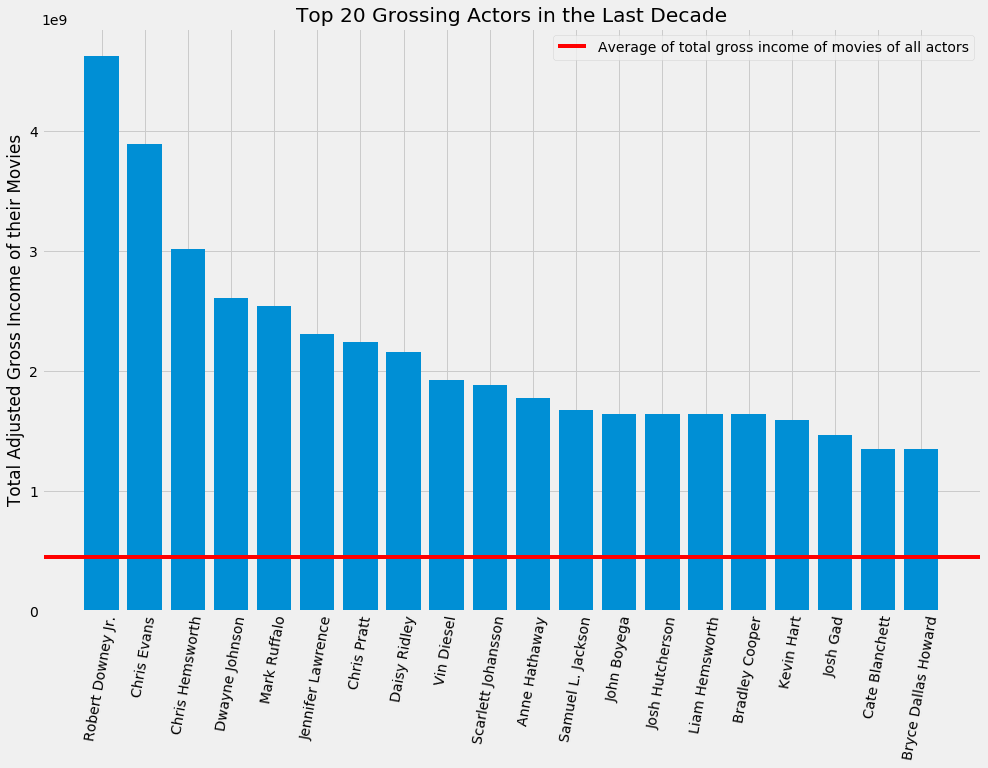

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Use built in matploblib template ###
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(actors_df_top_20_grossing["Actor"], actors_df_top_20_grossing["Adj. Lifetime Gross"])
ax.axhline(actors_df["Adj. Lifetime Gross"].mean(), color="red", label="Average of total gross income of movies of all actors")

ax.set_xticklabels(actors_df_top_20_grossing["Actor"], rotation=80)

ax.set_ylabel("Total Adjusted Gross Income of their Movies")
ax.set_title('Top 20 Grossing Actors in the Last Decade')
ax.legend()

plt.show()

In [69]:
### Install wordcloud package ###

conda install -c conda-forge wordcloud

Solving environment: done

## Package Plan ##

  environment location: /Users/Bryan/opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  conda                                           pkgs/main --> conda-forge



conda-4.8.2          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


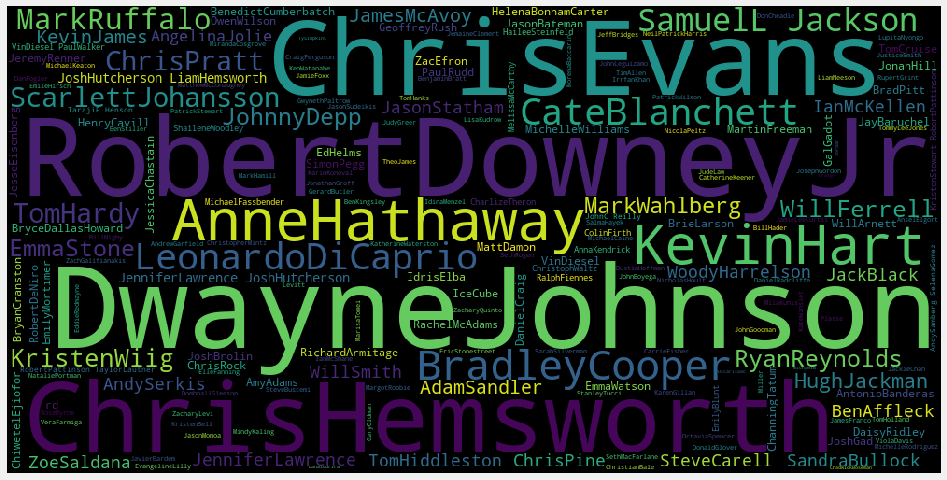

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Convert list to string and generate graph ###
unique_string=(" ").join(word_actors)
wordcloud = WordCloud(width = 1000, height = 500, background_color="black").generate(word_actors)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

plt.show()
plt.close()